# Performed segmentation

```{warning}
This notebook shows how to use a function that is poorly written and not optimized. The results from this function are also to be taken carefully.
```

This notebook show how to segment you data to find grain boundaries.

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu
import xarrayuvecs.lut2d as lut2d

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import datetime
from skimage import morphology
from tqdm.notebook import tqdm
import scipy

%matplotlib widget

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'

In [3]:
data=lda.aita5col(path_data)

In [4]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## Segment the data

In [5]:
plt.figure(figsize=(5,10))
out=data.aita.interactive_segmentation()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

## The new `xarray.DataSet.aita`

In [6]:
out.ds

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) bool True True True True True ... True True True True
    grainId      (y, x) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

### Plot micro

In [7]:
%matplotlib inline

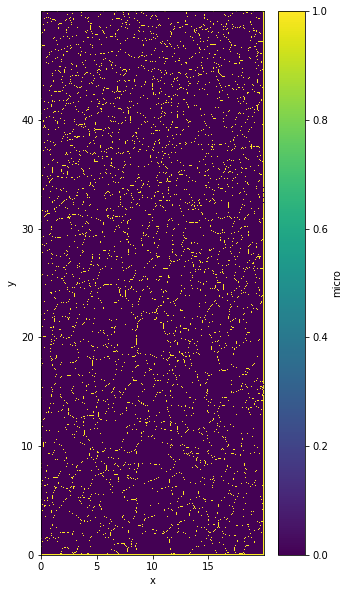

In [8]:
plt.figure(figsize=(5,10))
out.ds.micro.plot()

### Plot grainId

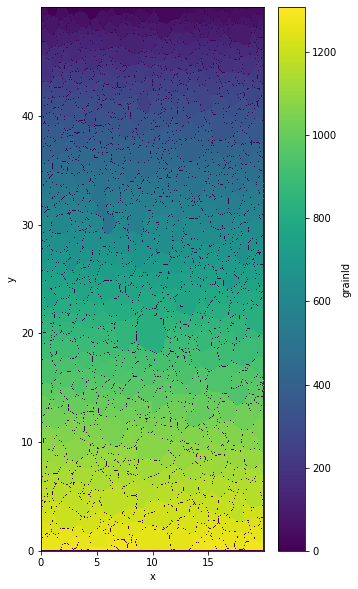

In [9]:
plt.figure(figsize=(5,10))
out.ds.grainId.plot()

## The parameters for the segmentation
If you want to re-do the segmentation with the same value they can be find here : 

In [10]:
print('Use scharr:',out.use_scharr)
print('Value scharr:',out.val_scharr)
print('Use canny:',out.use_canny)
print('Value canny:',out.val_canny)
print('Images canny:',out.img_canny)
print('Use quality:',out.use_quality)
print('Value quality:',out.val_quality)
print('Include border:',out.include_border)

Use scharr: True
Value scharr: 1.5
Use canny: True
Value canny: 1.5
Images canny: both color wheel
Use quality: True
Value quality: 60.0
Include border: True
